<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Очистка-текста-и-стемминг-слов" data-toc-modified-id="Очистка-текста-и-стемминг-слов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Очистка текста и стемминг слов</a></span></li><li><span><a href="#Деление-выборки-на-части" data-toc-modified-id="Деление-выборки-на-части-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Деление выборки на части</a></span></li></ul></li><li><span><a href="#Обучение-модели-логистической-регрессии-на-матрице-TF-IDF" data-toc-modified-id="Обучение-модели-логистической-регрессии-на-матрице-TF-IDF-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение модели логистической регрессии на матрице TF-IDF</a></span><ul class="toc-item"><li><span><a href="#Векторизация-текстов-с-помощью-TF-IDF" data-toc-modified-id="Векторизация-текстов-с-помощью-TF-IDF-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Векторизация текстов с помощью TF-IDF</a></span></li><li><span><a href="#Обучение-модели-логистической-регрессии" data-toc-modified-id="Обучение-модели-логистической-регрессии-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение модели логистической регрессии</a></span></li></ul></li><li><span><a href="#Обучение-модели-логистической-регрессии-на-матрице-BERT" data-toc-modified-id="Обучение-модели-логистической-регрессии-на-матрице-BERT-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение модели логистической регрессии на матрице BERT</a></span><ul class="toc-item"><li><span><a href="#Векторизация-текстов-с-помощью-BERT" data-toc-modified-id="Векторизация-текстов-с-помощью-BERT-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Векторизация текстов с помощью BERT</a></span></li><li><span><a href="#Обучение-модели-логистической-регрессии" data-toc-modified-id="Обучение-модели-логистической-регрессии-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение модели логистической регрессии</a></span></li></ul></li><li><span><a href="#Обучение-модели-CatBoost" data-toc-modified-id="Обучение-модели-CatBoost-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение модели CatBoost</a></span></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Определение токсичности комментариев

Интернет-магазин «Викишоп» запускает новый сервис. Пользователи смогут редактировать и дополнять описания товаров, как в вики-сообществах. Клиенты смогут вносить свои правки и комментировать изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Необходимо получить модель со значением метрики качества F1 не меньше 0.75. 

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm().pandas()
# from tqdm import notebook
# notebook.tqdm().pandas()

# игнорирование предупреждений
import warnings
warnings.filterwarnings('ignore')

# Модуль для работы с регулярными выражениями
import re

# Передаём стеммеру как аргумент значение 'english', чтобы включить лингвистический анализ 
# именно английского языка
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Чтобы очистить мешок слов, найдём стоп-слова, то есть слова без смысловой нагрузки.
from nltk.corpus import stopwords
# Чтобы пакет заработал, загрузим список стоп-слов.
# import nltk
# nltk.download('stopwords')

# модуль для разделения выборки на части
from sklearn.model_selection import train_test_split

# модуль для перемешивания значений признаков
from sklearn.utils import shuffle

# Вычислим TF-IDF для корпуса текстов. Обратимся к классу TfidfVectorizer().
from sklearn.feature_extraction.text import TfidfVectorizer

# импортируем алгоритм логистической регрессии
from sklearn.linear_model import LogisticRegression

# импортируем алгоритм градиентного бустинга
from catboost import CatBoostClassifier

# функции метрик
from sklearn.metrics import f1_score

# Импортируем библиотеку PyTorch, которая применяется в задачах обработки естественного текста и 
# компьютерного зрения.
import torch
# Модели типа BERT находятся в библиотеке transformers (англ. «трансформеры»). 
import transformers

# библиотека дя загрузки файлов из Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

0it [00:00, ?it/s]


Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/datasets/toxic_comments.csv')

display(df.head())
df.info()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [ ]:
print(df['toxic'].value_counts(normalize=True))

0    0.898321
1    0.101679
Name: toxic, dtype: float64


**Выводы**
1. Выборка довольно большая, содержит почти 160000 строк. Пропусков нет.
2. Выборка содержит комментрии на английском языке, что необходимо учитывать при выборе предобученной модели BERT.
3. Выборке наблюдается дисбаланс классов в соотношении 9:1 в пользу обектов нулевого класса.

### Очистка текста и стемминг слов

In [ ]:
# Напишем функцию очистки текста
def clear_text(text):
    # Регулярное выражение начинается с символа r, заключается в кавычки и квадратные скобки.
    # В квадратных скобках перечисляют все символы, подходящие под шаблон.
    # Если мы вызовем функцию re.sub(), указанные символы заменят пробелы. 
    # Чтобы указать, что символы под шаблон не подходят, т.е. их заменять пробелами не надо, поставим знак «домика» (^).
    re_text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Методом split() преобразуем текст с лишними пробелами в список. 
    # Если не указывать аргументы у split(), он делает разбиение по пробелам или группам пробелов.
    text_list = re_text.split()
    
    # Формируем список слов после стемминга
    stemmed_list = [stemmer.stem(word) for word in text_list]
    
    # Формируем список слов после лемматизации
    # lemm_list = [lemmatizer.lemmatize(word).lower() for word in text_list]
    
    # Список слов преобразуем в строку вызовом метода join()
    clear_text = ' '.join(stemmed_list)
    
    return clear_text

In [ ]:
%%script false --no-raise-error

# Переведём тексты в стандартный для Python формат: кодировку Unicode (U).
# Очистим текст и произведём стемминг слов.
df['clear_stemmed_text'] = df['text'].astype('unicode').progress_apply(clear_text)

Couldn't find program: 'false'


In [5]:
# df[['clear_stemmed_text', 'toxic']].to_csv('toxic_clear_comments.csv', index=False)

df = pd.read_csv('/content/gdrive/My Drive/datasets/toxic_clear_comments.csv')
df.head()

,clear_stemmed_text,toxic
0,explan whi the edit made under my usernam hard...,0
1,d aww he match this background colour i m seem...,0
2,hey man i m realli not tri to edit war it s ju...,0
3,more i can t make ani real suggest on improv i...,0
4,you sir are my hero ani chanc you rememb what ...,0


In [6]:
# Удаление возможных пропусков
df.dropna(inplace=True);

### Деление выборки на части

In [7]:
# Отделим целевой признак от остальных.
x = df['clear_stemmed_text']
y = df['toxic']

del df

# Отделим 20% данных для тестовой выборки.
x_train_valid, x_test, y_train_valid, y_test = train_test_split(
    x, y, test_size=0.20, random_state=12345)

# Создадим обучающую и валидационную выборки.
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_valid, y_train_valid, test_size=0.25, random_state=12345)

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(95738,)
(31913,)
(31913,)


## Обучение модели логистической регрессии на матрице TF-IDF

### Векторизация текстов с помощью TF-IDF

In [ ]:
# Создадим множество стоп-слов - слов без смысловой нагрузки 
# Например, к стоп-словам относят местоимения, союзы и предлоги
stop_words = set(stopwords.words('english'))

# Инициализируем векторизатор с учётом стоп-слов
count_tf_idf = TfidfVectorizer(stop_words=stop_words)

# Вычислим TF-IDF для корпусов текстов.
tf_idf_train = count_tf_idf.fit_transform(x_train)
tf_idf_valid = count_tf_idf.transform(x_valid)
tf_idf_test = count_tf_idf.transform(x_test)

print(tf_idf_train.shape)
print(tf_idf_valid.shape)
print(tf_idf_test.shape)

(95738, 96889)
(31913, 96889)
(31913, 96889)


### Обучение модели логистической регрессии

In [ ]:
# Инициализируем модель логистической регрессии
model = LogisticRegression(
                           class_weight='balanced', 
                           random_state=12345, 
                           )

# Обучаем модель на тренировочной выборке
model.fit(tf_idf_train, y_train)

# в каждом случае оценим "вероятности" того, что целевой признак примет значение 0 или 1
probabilities_valid = model.predict_proba(tf_idf_valid)

# в каждом случае оценим "вероятности" того, что целевой признак примет значение 1
probabilities_one_valid = probabilities_valid[:, 1]

In [ ]:
f1 = []

# Список пороговых значений
# thresholds = np.unique(probabilities_one_valid)
thresholds = np.arange(0, 1, 0.01)

for threshold in thresholds:
    # Получаем список предсказаний для текущего порогового значения
    predicted_valid = probabilities_one_valid > threshold
    # Рассчитаем F1-меру и добавляем её в список
    f1.append(f1_score(y_valid, predicted_valid))

# Преобрразуем список F1-мер для разных поороговых значений в Series
f1 = pd.Series(f1)

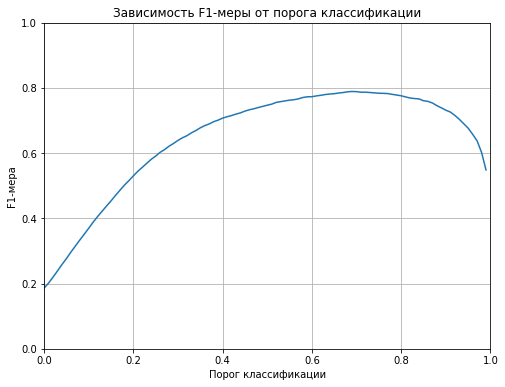

Наибольшее значение F1 = 0.79 достигается при пороговом значении 0.69.


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1)

plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.grid()

plt.xlabel('Порог классификации')
plt.ylabel('F1-мера')
plt.title('Зависимость F1-меры от порога классификации')

plt.show()

print(f'Наибольшее значение F1 = {f1.max():.2f} достигается при пороговом значении {thresholds[f1.idxmax()]:.2f}.')

## Обучение модели логистической регрессии на матрице BERT

### Векторизация текстов с помощью BERT

In [8]:
# Инициализируем токенизатор как объект класса BertTokenizer(). 
# Передадим ему аргумент vocab_file — это файл со словарём, на котором обучалась модель.
tokenizer = transformers.BertTokenizer(
    vocab_file='/content/gdrive/My Drive/BERT/vocab.txt')


# Создадим специальную функцию для кодирования текстов
def encode(text):
    return tokenizer.encode(text, add_special_tokens=True)

# Токейнизируем тексты. Присваиваем словам номера из словаря 'vocab.txt'
tokenized_vectors = x.progress_apply(
    lambda x: tokenizer.encode(x, add_special_tokens=True))

100%|██████████| 159564/159564 [05:23<00:00, 493.10it/s]


In [9]:
# Ограничим максимальную длину вектора (ограничение прописано в файле'bert_config.json')
max_len = 512

def vector_len_lim(list):
    if len(list) > max_len:
        del list[max_len:]
    else:
        list.extend([0]*(max_len - len(list)))

# Применим метод padding (англ. «отступ»), чтобы после токенизации длины исходных текстов в корпусе были равными. 
# Только при таком условии будет работать модель BERT.
tokenized_vectors.progress_apply(vector_len_lim)
padded = np.array([i for i in tokenized_vectors.values])

# Проверка одинаковой длины векторов
for vector in tokenized_vectors.values:
    if len(vector) != max_len:
        print(len(vector))

# Кодируем имеющиеся в тексте слова единичками.
# Cоздадим маску для выделения важных токенов.
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

100%|██████████| 159564/159564 [00:00<00:00, 161908.88it/s]


(159564, 512)

In [10]:
# Инициализируем конфигурацию BertConfig (англ. Bert Configuration). 
# В качестве аргумента передадим ей JSON-файл с описанием настроек модели. 
config = transformers.BertConfig.from_json_file(
    '/content/gdrive/My Drive/BERT/bert_config.json')

# Затем инициализируем саму модель класса BertModel. 
# Передадим ей файл с предобученной моделью и конфигурацией:
model = transformers.BertModel.from_pretrained(
    '/content/gdrive/My Drive/BERT/pytorch_model.bin', config=config)

Some weights of the model checkpoint at /content/gdrive/My Drive/BERT/pytorch_model.bin were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
# Можно сделать предварительную проверку на наличие GPU
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [20]:
# Эмбеддинги модель BERT создаёт батчами. 
# Чтобы хватило оперативной памяти, сделаем размер батча небольшим:
batch_size = 100

# Cделаем пустой список для хранения эмбеддингов твитов.
embeddings = []

# Сделаем цикл по батчам.
for i in tqdm(range(padded.shape[0] // batch_size)):
        # Преобразуем данные в формат тензоров (англ. tensor) — многомерных векторов в библиотеке torch. 
        # Тип данных LongTensor (англ. «длинный тензор») хранит числа в «длинном формате», 
        # то есть выделяет на каждое число 64 бита.
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]).to(device) 
        # batch = torch.LongTensor(input_ids[batch_size*i:batch_size*(i+1)]).cuda() # другой вариант
        
        # Преобразуем маску
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).to(device)
        
        # Для ускорения вычисления функцией no_grad() (англ. no gradient, «нет градиента») в библиотеке torch укажем,
        # что градиенты не нужны: модель BERT обучать не будем.
        with torch.no_grad():  
            model.to(device)
            # Чтобы получить эмбеддинги для батча, передадим модели данные и маску
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
       
        # Из полученного тензора извлечём нужные элементы и добавим в список всех эмбеддингов.
        # Преобразуем элементы методом numpy() к типу numpy.array.
        # embeddings.append(batch_embeddings[0][:,0,:].numpy())
        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на проц, чтобы в numpy "кинуть"

        del batch
        del attention_mask_batch
        del batch_embeddings

100%|██████████| 1595/1595 [1:28:16<00:00,  3.32s/it]


In [21]:
# Соберём все эмбеддинги в матрицу признаков вызовов функции concatenate().
features = np.concatenate(embeddings)

In [22]:
# Контроль размеров матрицы
np.shape(features)

(159500, 768)

In [23]:
# Сохранение векторов в файл
np.save('/content/gdrive/My Drive/datasets/embeddings', features)

In [27]:
# Отделим 20% данных для тестовой выборки.
features_train_valid, features_test, target_train_valid, target_test = train_test_split(
    features, y[:features.shape[0]], test_size=0.20, random_state=12345)

# Создадим обучающую и валидационную выборки.
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_valid, target_train_valid, test_size=0.25, random_state=12345)

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(95700, 768)
(31900, 768)
(31900, 768)


### Обучение модели логистической регрессии

In [28]:
# Инициализируем модель логистической регрессии
model = LogisticRegression(
                           class_weight='balanced', 
                           random_state=12345, 
                           )

# Обучаем модель на тренировочной выборке
model.fit(features_train, target_train)

# в каждом случае оценим "вероятности" того, что целевой признак примет значение 0 или 1
probabilities_valid = model.predict_proba(features_valid)

# в каждом случае оценим "вероятности" того, что целевой признак примет значение 1
probabilities_one_valid = probabilities_valid[:, 1]

In [30]:
f1 = []

# Список пороговых значений
# thresholds = np.unique(probabilities_one_valid)
thresholds = np.arange(0, 1, 0.01)

for threshold in thresholds:
    # Получаем список предсказаний для текущего порогового значения
    predicted_valid = probabilities_one_valid > threshold
    # Рассчитаем F1-меру и добавляем её в список
    f1.append(f1_score(target_valid, predicted_valid))

# Преобрразуем список F1-мер для разных поороговых значений в Series
f1 = pd.Series(f1)

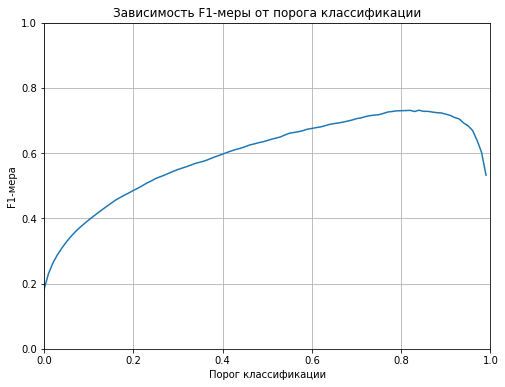

Наибольшее значение F1 = 0.73 достигается при пороговом значении 0.84.


In [31]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1)

plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.grid()

plt.xlabel('Порог классификации')
plt.ylabel('F1-мера')
plt.title('Зависимость F1-меры от порога классификации')

plt.show()

print(f'Наибольшее значение F1 = {f1.max():.2f} достигается при пороговом значении {thresholds[f1.idxmax()]:.2f}.')

## Обучение модели CatBoost

In [32]:
x_train = x_train.to_frame()
x_valid = x_valid.to_frame()

display(type(x_train))
display(type(x_valid))

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [33]:
# Указываем гиперпараметры алгоритма градиентного бустинга
params = {'iterations': 500,
          'auto_class_weights': 'Balanced',
          'text_features': ['clear_stemmed_text'],
          'random_state': 12345,
          'eval_metric': 'F1',
          'verbose': 100}

# Инициализируем модель градиентного бустинга
cat_boost = CatBoostClassifier(**params)


cat_boost.fit(          x_train, y_train, 
              eval_set=(x_valid, y_valid))

Learning rate set to 0.132186
0:	learn: 0.8489387	test: 0.8730637	best: 0.8730637 (0)	total: 389ms	remaining: 3m 14s
100:	learn: 0.9033548	test: 0.9079688	best: 0.9079688 (100)	total: 31.4s	remaining: 2m 3s
200:	learn: 0.9178547	test: 0.9121101	best: 0.9121101 (200)	total: 1m 3s	remaining: 1m 33s
300:	learn: 0.9285553	test: 0.9111678	best: 0.9125051 (253)	total: 1m 34s	remaining: 1m 2s
400:	learn: 0.9368477	test: 0.9111105	best: 0.9125051 (253)	total: 2m 4s	remaining: 30.7s
499:	learn: 0.9446820	test: 0.9107039	best: 0.9125051 (253)	total: 2m 38s	remaining: 0us

bestTest = 0.9125051243
bestIteration = 253

Shrink model to first 254 iterations.


In [34]:
# В каждом случае оценим "вероятности" того, что целевой признак примет значение 0 или 1
probabilities_valid = cat_boost.predict_proba(x_valid)

# В каждом случае оценим "вероятности" того, что целевой признак примет значение 1
probabilities_one_valid = probabilities_valid[:, 1]

In [36]:
f1 = []

# Список пороговых значений
thresholds = np.arange(0, 1, 0.01)

for threshold in tqdm(thresholds):
    # Получаем список предсказаний для текущего порогового значения
    predicted_valid = probabilities_one_valid > threshold
    # Рассчитаем F1-меру и добавляем её в список
    f1.append(f1_score(y_valid, predicted_valid))

# Преобразуем список F1-мер для разных поороговых значений в Series
f1 = pd.Series(f1)

# Определим лучшее пороговое значение
best_threshold_cat_boost = thresholds[f1.idxmax()]

100%|██████████| 100/100 [00:01<00:00, 61.22it/s]


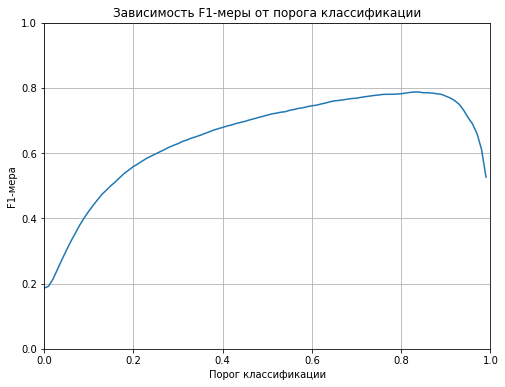

Наибольшее значение F1 = 0.79 достигается при пороговом значении 0.84.


In [37]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1)

plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.grid()

plt.xlabel('Порог классификации')
plt.ylabel('F1-мера')
plt.title('Зависимость F1-меры от порога классификации')

plt.show()

print(f'Наибольшее значение F1 = {f1.max():.2f} достигается при пороговом значении {best_threshold_cat_boost:.2f}.')

## Тестирование лучшей модели

На валидационной выборке полученные модели показали следующие результаты:
1. Модель логистической регрессии, обученная на матрице TF-IDF: F1 = 0,79.
2. Модель логистической регрессии, обученная с помощью BERT: F1 = 0,73.
3. Модель CatBoost: F1 = 0,79.

Для тестирования используем модель CatBoost, поскольку она показала один из лучших результатов по качеству прогнозирования и при этом не требует специальной подготовки текстовых признаков (векторизации).

In [39]:
x_test = x_test.to_frame()
display(type(x_test))

pandas.core.frame.DataFrame

In [40]:
# В каждом случае оценим "вероятности" того, что целевой признак примет значение 0 или 1
probabilities_test = cat_boost.predict_proba(x_test)

# В каждом случае оценим "вероятности" того, что целевой признак примет значение 1
probabilities_one_test = probabilities_test[:, 1]


predicted_test = probabilities_one_test > best_threshold_cat_boost
f1_score(y_test, predicted_test)

0.7835990888382689

**Вывод**. Значение метрики F1 на тестовой выборке превышает допустимое значение 0,75. Задача решена.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики F1 не меньше 0.75
- [x]  Выводы написаны